In [18]:
import numpy as np
import matplotlib.pyplot as plt

## 泊松分布

#### 适合于描述单位时间内随机事件发生的次数的概率分布。如: 

* 服务器在一定时间内受到的服务请求的次数
* 汽车站台的候客人数
* 机器出现的故障数
* 自然灾害发生的次数
* DNA序列的变异数
* 放射性原子核的衰变数
* 激光的光子数分布等等。（单位时间内发生的次数，可以看作事件发生的频率，类似物理的频率 𝑓）。

<h3 style="text-align: center;">$ P(K)=\frac{\lambda^ke^{-\lambda}}{k!} $</h3>

### 使用 np.random.poisson() 生成泊松分布，因此需要 2 个参数

* lam：一段时间内的期望值，必须 >= 0

* size：int 或 tuple of ints, 可选。为输出形状：

    * None：输出一个数
    * int：输出一个一维数组，长度为 int 类型的输入值
    * (m, n, k, ...)：输出一个矩阵，形状为 (m, n, k, ...)
    
#### 输出为围绕 lam 值，选取的小于，等于，或大于 lam 的数值，整个数组的均值约等于 lam 



#### 为简便起见，生成一个 lambda = 5， 总共 10000 个样本的一维泊松分布数组

In [27]:
lam = 5
size = 10000

t = np.random.poisson(lam, size)
t

array([1, 1, 3, ..., 5, 5, 2])

#### 可以看到数组 t 的均值差不多 = lambda

### 考察最大，最小的离散值，可以发现，与二项分布不同，随机值的取值是会 > lambda

In [43]:
print(f"泊松分布数据均值 = {t.mean()}")
print(f"泊松分布数据最大值 = {t.max()}")
print(f"泊松分布数据最小值 = {t.min()}")

泊松分布数据均值 = 5.000391
泊松分布数据最大值 = 18
泊松分布数据最小值 = 0


#### 使用 np.bincount，可以看到总共有 6715 个 0， 33667 个 1，等等，以此类推
#### 而其中，数值 4 和 5 的数量最多

In [40]:
s = np.bincount(t)
s

array([  6715,  33667,  84724, 140010, 175560, 175112, 146150, 104619,
        65052,  36551,  18041,   8304,   3440,   1326,    482,    169,
           47,     27,      4])

#### 将<i>每个数值 / 总数</i>，算出每个数值出现的概率

In [ ]:
p = s / s.sum()
p

### 画出图后看到 4 在峰值，5 接近峰值

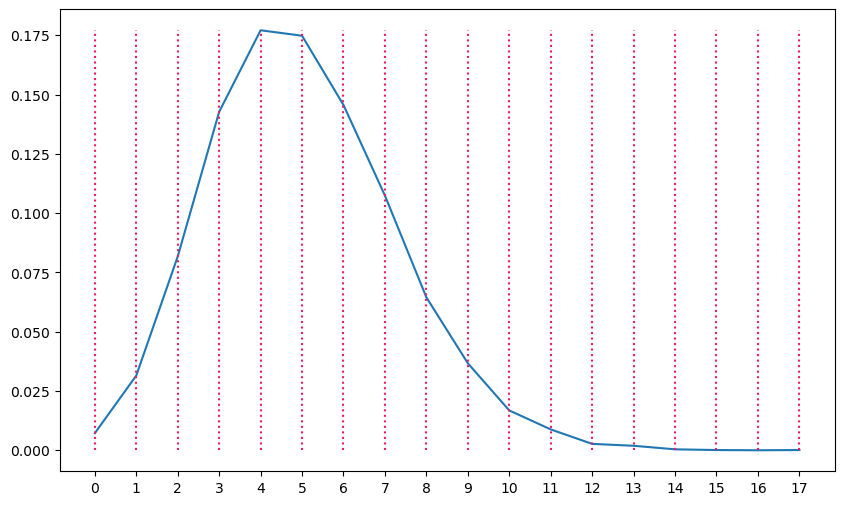

In [30]:
plt.figure(figsize = (10, 6))

plt.plot(p)

plt.xticks(range(len(p)))
plt.vlines(x = range(len(p)), ymin = p.min(), ymax = p.max(), linestyles ="dotted", colors ="#E91E63")
plt.show()

### 将输出个数增加，可以看到，泊松分布图形是向右偏移

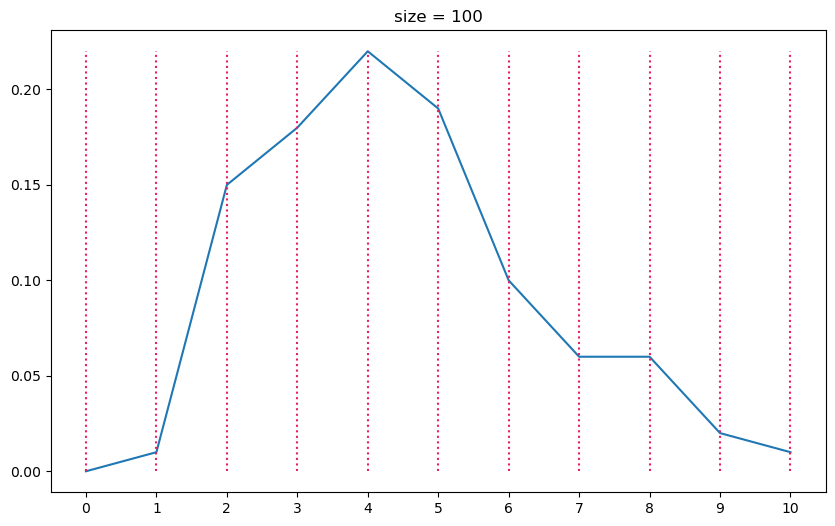

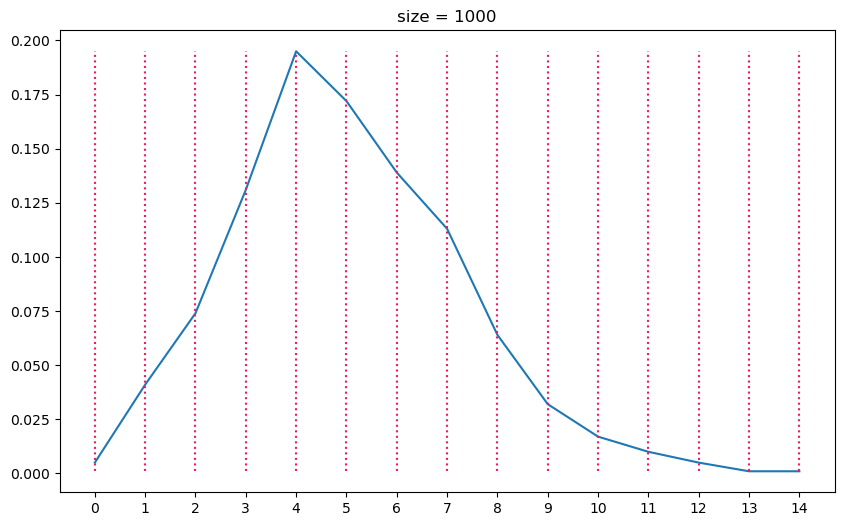

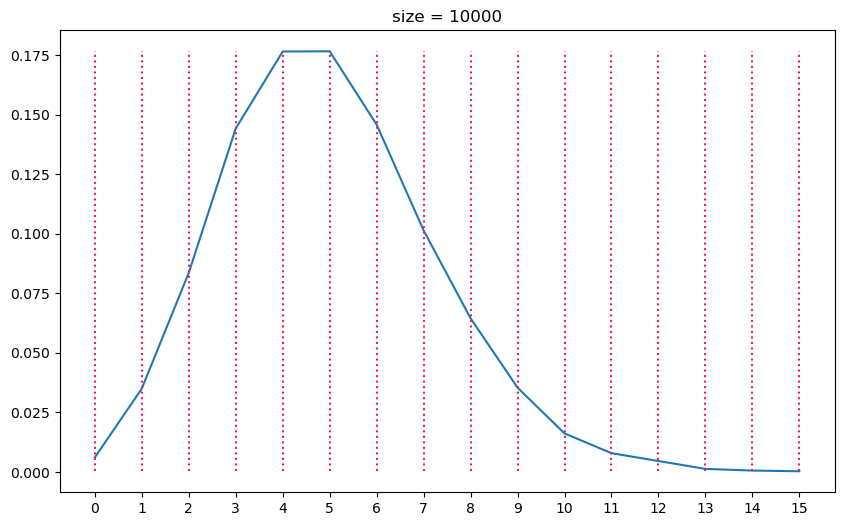

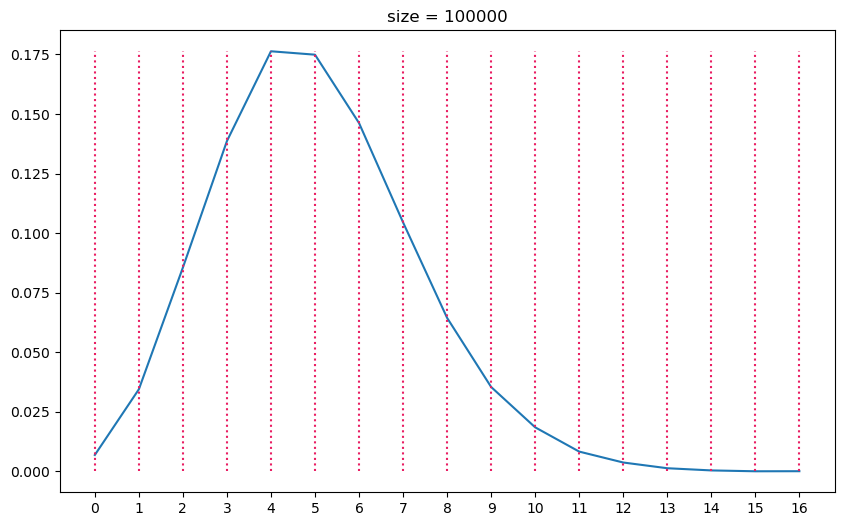

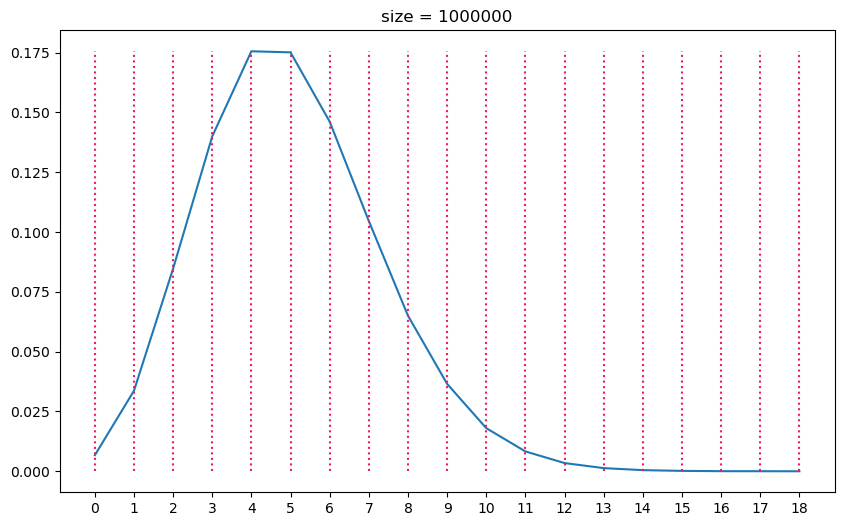

In [39]:
lam = 5

for size in [100, 1000, 10000, 100000, 1000000]:
    
    t = np.random.poisson(lam, size)
    s = np.bincount(t)
    p = s / s.sum()
    
    plt.figure(figsize = (10, 6))

    plt.plot(p)
    plt.title(f'size = {size}')
    plt.xticks(range(len(p)))
    plt.vlines(x = range(len(p)), ymin = p.min(), ymax = p.max(), linestyles ="dotted", colors ="#E91E63")
    plt.show()